# Broken Timeline Plot Gallery

The broken timeline plot is used for visualizing data availability across categories over time, showing periods where data is available as horizontal bars, with gaps indicating missing data periods.

Broken timeline plots excel at:
- **Data Quality Assessment**: Visualize data availability gaps across categories/segments over time
- **Product Availability Analysis**: Identify periods with stock outs by store/category
- **Seasonality Analysis**: Assess periods of low sales that may indicate seasonality or other trends
- **Gap Analysis**: Quickly identify missing data patterns across multiple categories

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pyretailscience.plots import broken_timeline

## Basic Broken Timeline Plot

Visualize data availability across multiple stores over time, showing continuous periods and gaps.

---

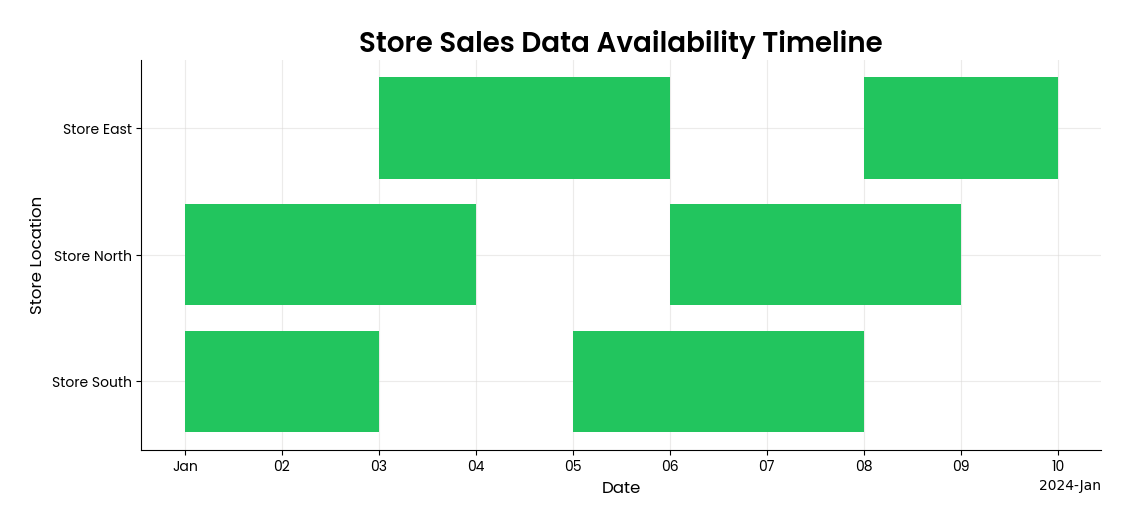

In [ ]:
# Create sample store sales data with gaps
# fmt: off
store_sales_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime([
            "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-06", "2024-01-07", "2024-01-08",  # Store North
            "2024-01-01", "2024-01-02", "2024-01-05", "2024-01-06", "2024-01-07",  # Store South
            "2024-01-03", "2024-01-04", "2024-01-05", "2024-01-08", "2024-01-09",  # Store East
        ]),
        "store_id": ["Store North"] * 6 + ["Store South"] * 5 + ["Store East"] * 5,
        "sales_amount": [1200, 1350, 1180, 1420, 1580, 1650, 980, 1100, 1240, 1380, 1290, 850, 920, 1050, 1180, 1120],
    },
)
# fmt: on

ax = broken_timeline.plot(
    store_sales_data,
    category_col="store_id",
    value_col="sales_amount",
    title="Store Sales Data Availability Timeline",
    x_label="Date",
    y_label="Store Location",
)
plt.show()

## Weekly Period Aggregation

Aggregate data by weeks instead of days using the `period` parameter for longer time ranges.

---

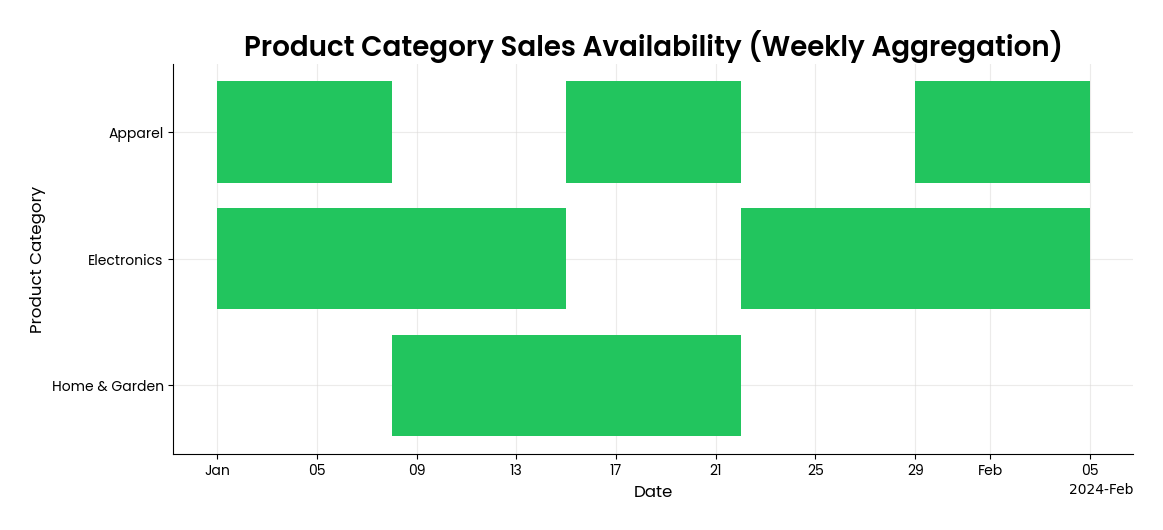

In [ ]:
# Create sample data spanning multiple weeks
# fmt: off
weekly_sales_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime([
            "2024-01-01", "2024-01-03", "2024-01-08", "2024-01-10", "2024-01-22", "2024-01-24", "2024-01-29", "2024-01-31",  # Electronics
            "2024-01-01", "2024-01-02", "2024-01-15", "2024-01-16", "2024-01-29", "2024-01-30",  # Apparel
            "2024-01-08", "2024-01-09", "2024-01-15", "2024-01-17",  # Home & Garden
        ]),
        "product_category": ["Electronics"] * 8 + ["Apparel"] * 6 + ["Home & Garden"] * 4,
        "weekly_sales": [
            5200, 4800, 6100, 5800, 7200, 6900, 8100, 7800,  # Electronics
            3200, 3500, 4100, 3800, 4500, 4200,  # Apparel
            2800, 3100, 3400, 3200,  # Home & Garden
        ],
    },
)
# fmt: on

ax = broken_timeline.plot(
    weekly_sales_data,
    category_col="product_category",
    value_col="weekly_sales",
    title="Product Category Sales Availability (Weekly Aggregation)",
    x_label="Date",
    y_label="Product Category",
    period="W",
)
plt.show()

## Threshold Filtering

Filter out periods with values below a threshold to focus on significant sales periods only.

---

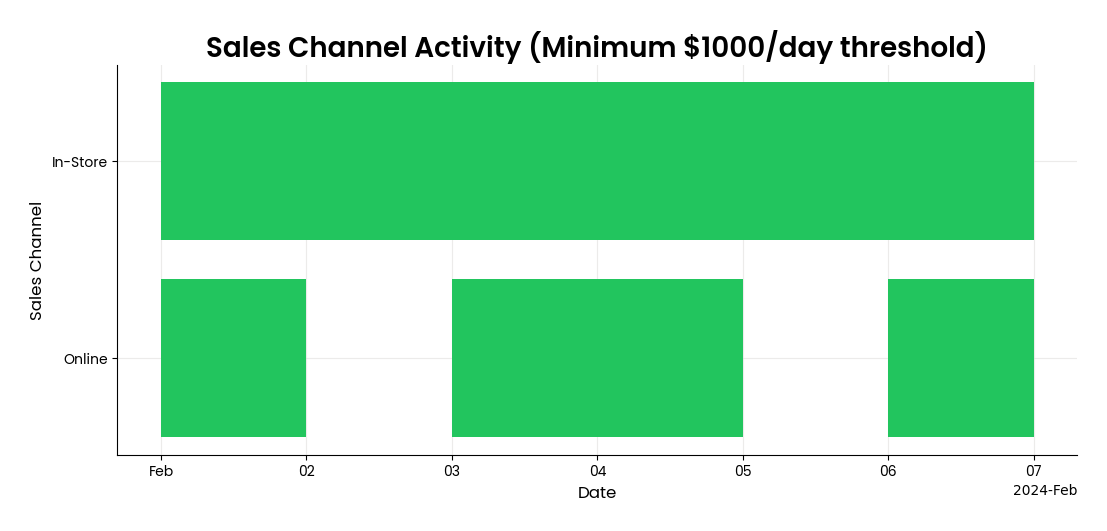

In [ ]:
# Create sample data with varying sales amounts
# fmt: off
threshold_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            ["2024-02-01", "2024-02-02", "2024-02-03", "2024-02-04", "2024-02-05", "2024-02-06"] * 3,
        ),
        "sales_channel": ["Online"] * 6 + ["In-Store"] * 6 + ["Phone Orders"] * 6,
        "daily_revenue": [
            2500, 180, 2800, 3200, 120, 2900, 4500, 4200, 4800, 5100, 4700, 4900, 150, 180,
            220, 190, 160, 140,
        ],
    },
)
# fmt: on

ax = broken_timeline.plot(
    threshold_data,
    category_col="sales_channel",
    value_col="daily_revenue",
    title="Sales Channel Activity (Minimum $1000/day threshold)",
    x_label="Date",
    y_label="Sales Channel",
    threshold_value=1000,
)
plt.show()

## Custom Aggregation Function

Use different aggregation functions like 'mean' or 'max' instead of the default 'sum'.

---

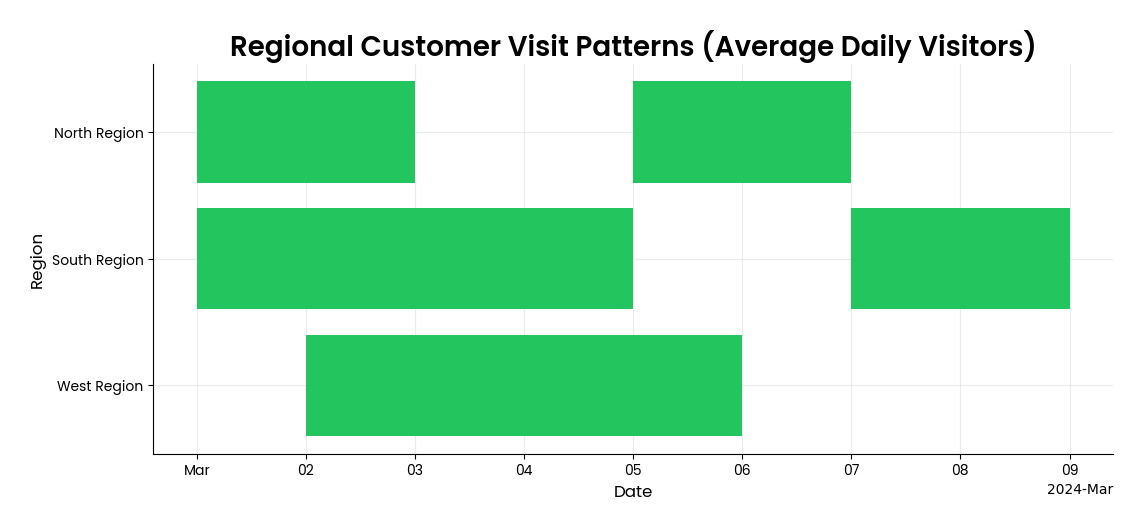

In [ ]:
# Create sample customer visit data
# fmt: off
customer_visits = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime([
            "2024-03-01", "2024-03-01", "2024-03-02", "2024-03-02", "2024-03-02", "2024-03-05", "2024-03-06", "2024-03-06",  # North
            "2024-03-01", "2024-03-02", "2024-03-03", "2024-03-04", "2024-03-07", "2024-03-08",  # South
            "2024-03-02", "2024-03-03", "2024-03-04", "2024-03-05",  # West
        ]),
        "region": ["North Region"] * 8 + ["South Region"] * 6 + ["West Region"] * 4,
        "daily_visitors": [450, 380, 520, 490, 410, 360, 480, 440, 380, 420, 390, 450, 480, 390, 320, 350, 380, 340],
    },
)
# fmt: on

ax = broken_timeline.plot(
    customer_visits,
    category_col="region",
    value_col="daily_visitors",
    title="Regional Customer Visit Patterns (Average Daily Visitors)",
    x_label="Date",
    y_label="Region",
    agg_func="mean",
)
plt.show()